In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("C:\\Users\\lenovo\\Documents\\Kaggle\\P1\\BigBasket_Products.csv")

In [3]:
df.head(5)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.shape

(27555, 10)

In [5]:
df.nunique()

index           27555
product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
description     21944
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [8]:
print("Null Percentage for each column::")
print('--'*30)
    
def nullPercentage():
    for col in df.columns:
        null_count=df[col].isnull().sum()
        total_count=df.shape[0]
        
        percentage=null_count/total_count*100
        print(col,":",round(percentage,2))
        #print('\n')
        
nullPercentage()

Null Percentage for each column::
------------------------------------------------------------
index : 0.0
product : 0.0
category : 0.0
sub_category : 0.0
brand : 0.0
sale_price : 0.0
market_price : 0.0
type : 0.0
rating : 31.3
description : 0.42


Text(0.5, 1.0, 'Null Values')

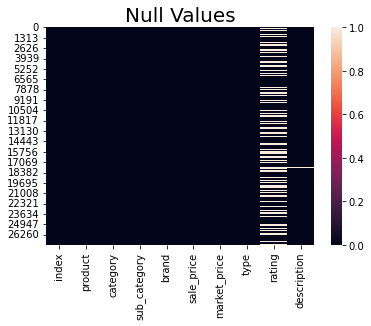

In [9]:
sns.heatmap(df.isnull())
plt.title("Null Values", fontsize =20)


### Replacing Null Values in "Rating" column with the mean

In [10]:
# Filling Null Values in Rating COlumn

df['rating'].fillna(df['rating'].mean(),inplace=True)
df.isnull().sum()

index             0
product           1
category          0
sub_category      0
brand             1
sale_price        0
market_price      0
type              0
rating            0
description     115
dtype: int64

### After Replacing all Null Values

Text(0.5, 1.0, 'Null Values')

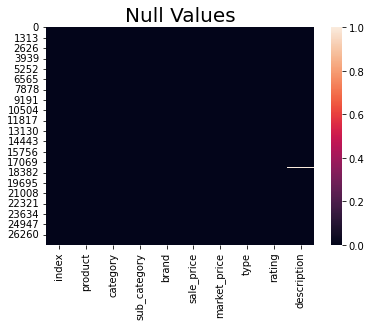

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Values", fontsize =20)

In [12]:
# Print all unique categories present in Dataset
for col in df['category'].unique():
    print(col)

Beauty & Hygiene
Kitchen, Garden & Pets
Cleaning & Household
Gourmet & World Food
Foodgrains, Oil & Masala
Snacks & Branded Foods
Beverages
Bakery, Cakes & Dairy
Baby Care
Fruits & Vegetables
Eggs, Meat & Fish


Text(0.5, 1.0, 'Name of Different Categories')

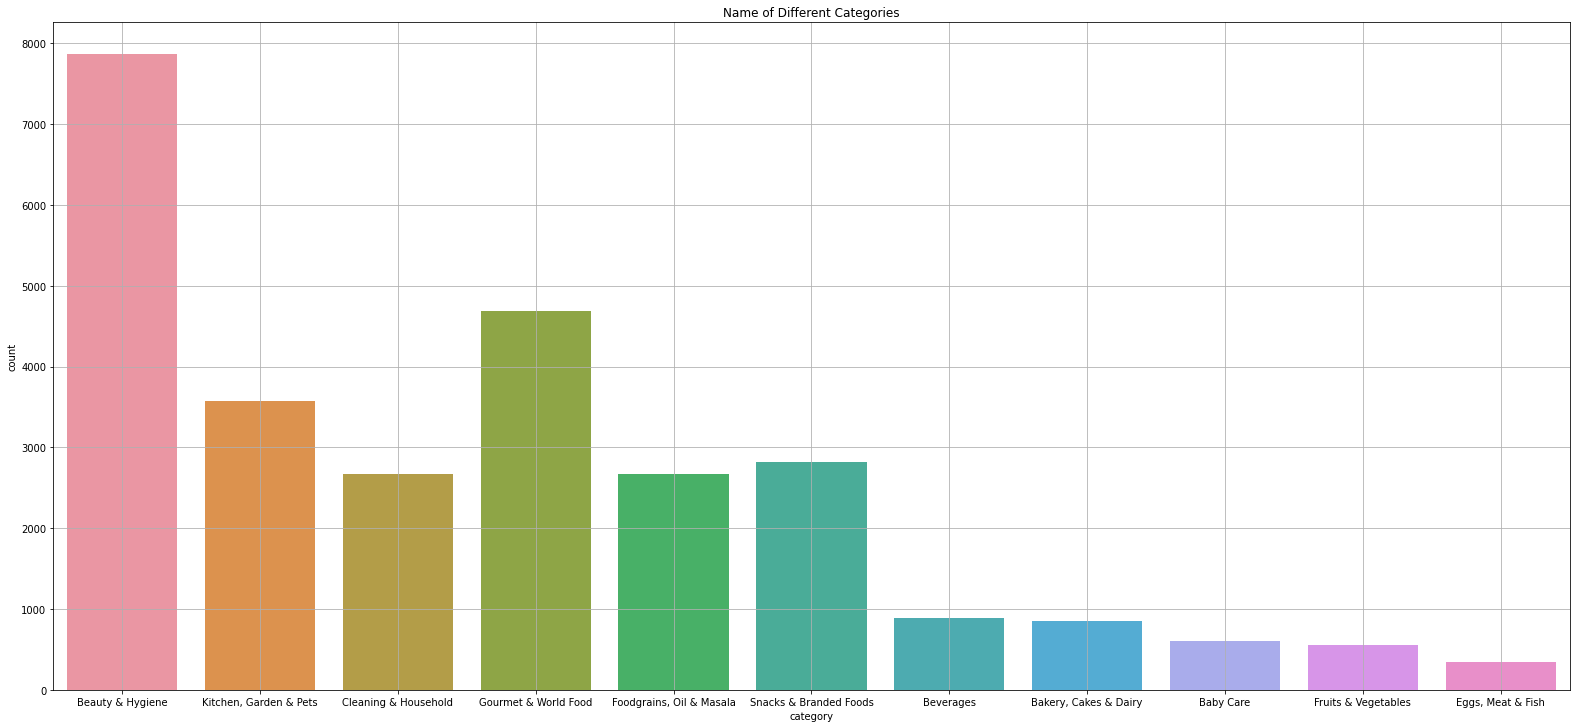

In [13]:
plt.figure(figsize=(22,10))
sns.countplot(x='category',data=df)
plt.tight_layout()
plt.grid()
plt.title("Name of Different Categories")


In [14]:
# All unique sub_categories present in Dataset
for elem in df['sub_category'].unique():
    print(elem,end='',sep=' ')

Hair CareStorage & AccessoriesPooja NeedsBins & Bathroom WareBath & Hand WashAll Purpose CleanersSkin CareMops, Brushes & ScrubsCooking & Baking NeedsChocolates & BiscuitsFresheners & RepellentsSnacks, Dry Fruits, NutsDairy & CheesePasta, Soup & NoodlesDry FruitsDrinks & BeveragesKitchen AccessoriesFlask & CasseroleBreakfast CerealsFrozen Veggies & SnacksFruit Juices & DrinksCookies, Rusk & KhariFragrances & DeosTeaMasalas & SpicesMen's GroomingChocolates & CandiesSteel UtensilsTinned & Processed FoodOrganic StaplesSauces, Spreads & DipsPickles & ChutneyReady To Cook & EatBaby Bath & HygieneStationeryPet Food & AccessoriesBiscuits & CookiesOral CareSnacks & NamkeenDetergents & DishwashCrockery & CutleryCuts & SproutsHealth & MedicineCookware & Non StickDairyFeminine HygieneDiapers & WipesEdible Oils & GheeBaby Food & FormulaFresh FruitsFresh VegetablesHerbs & SeasoningsBreads & BunsOils & VinegarFeeding & NursingEnergy & Soft DrinksAppliances & ElectricalsSalt, Sugar & JaggeryGourmet B

In [15]:
counts = df['sub_category'].value_counts()
counts=counts.head(10)




In [16]:
counts_df_1 = pd.DataFrame({'Sub_Category':counts.index,'Counts':counts.values})
counts_df_1



,Sub_Category,Counts
0,Skin Care,2294
1,Health & Medicine,1133
2,Hair Care,1028
3,Storage & Accessories,1015
4,Fragrances & Deos,1000
5,Bath & Hand Wash,996
6,Crockery & Cutlery,890
7,Masalas & Spices,889
8,"Snacks, Dry Fruits, Nuts",840
9,Men's Grooming,805


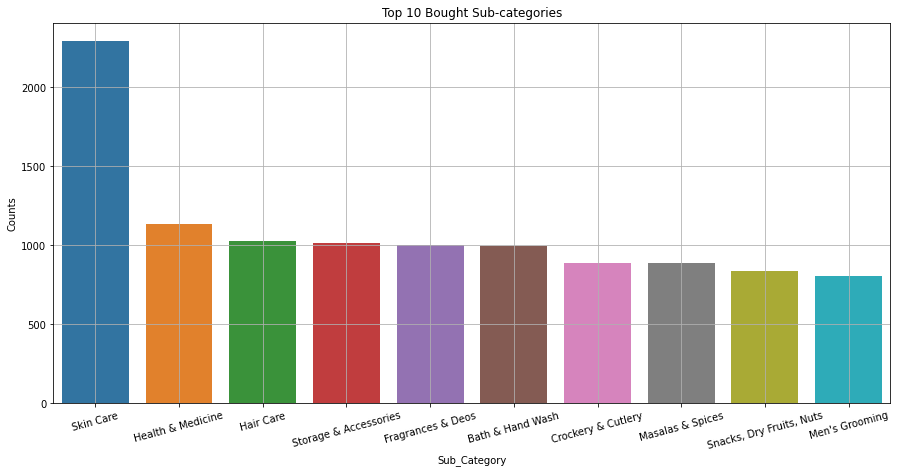

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x='Sub_Category',y='Counts',data=counts_df_1)
plt.xticks(rotation=15)
plt.title("Top 10 Bought Sub-categories")
plt.grid()

In [18]:
#All unique types present in Dataset
for elem in df['type'].unique():
    print(elem)

Hair Oil & Serum
Water & Fridge Bottles
Lamp & Lamp Oil
Laundry, Storage Baskets
Bathing Bars & Soaps
Disinfectant Spray & Cleaners
Face Care
Hand Wash & Sanitizers
Shampoo & Conditioner
Utensil Scrub-Pad, Glove
Flours & Pre-Mixes
Luxury Chocolates, Gifts
Floor & Other Cleaners
Mosquito Repellent
Soap Cases & Dispensers
Aromatherapy
Roasted Seeds & Nuts
Tofu
Tools & Accessories
Imported Noodles
Other Dry Fruits
Gourmet Tea & Tea Bags
Choppers & Graters
Casserole
Granola & Cereal Bars
Frozen Veg Snacks
Lip Care
Juices
Bakery Biscuits, Cookies
Men's Deodorants
Green Tea
Containers Sets
Whole Spices
Blended Masalas
Chocolates
Eau De Toilette
Cookies, Biscotti, Wafer
Steel Lunch Boxes
Olive, Jalapeno, Gherkin
Organic Rice, Other Rice
Shaving Care
Imported Cleaners
Thai & Asian Sauces
Chutney Powder
Cooking Pastes
Gourmet Juices & Drinks
Face & Body
Beans & Pulses
Papads, Ready To Fry
Hair & Scalp Treatment
Baby Health
Notebooks, Files, Folders
Kitchen Tools & Other Accessories
Pet Meals & 

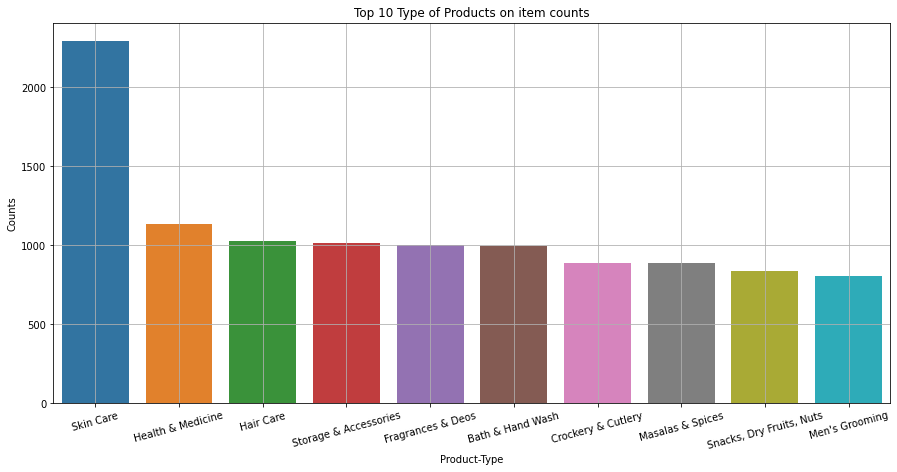

In [19]:
counts1 = df['type'].value_counts()
counts1=counts.head(10)


counts_df_2 = pd.DataFrame({'Product-Type':counts1.index,'Counts':counts1.values})
counts_df_2

plt.figure(figsize=(15,7))
sns.barplot(x='Product-Type',y='Counts',data=counts_df_2)
plt.xticks(rotation=15)
plt.title("Top 10 Type of Products on item counts")
plt.grid()

In [20]:
#df.loc[df['brand'].isnull()]

df.drop(9765,inplace=True)

all_brands = ' '.join([text for text in df['brand']])
all_brands # Name of Different Brands

"Sri Sri Ayurveda  Mastercook Trm Nakoda Nivea Nature Protect Satinance Bionova StBotanica Scotch brite NUTRASHIL Sapphire Oxy Clorox Herbal Strategi Nakoda Aroma Treasures Graminway True Elements Murginns Bronson Professional Koka NaturoBell Cambridge Tea Party IRICH Cello Fit & Flex Safe Harvest Switz Organic Harvest Real Cadbury Old Spice Octavius Steelo bb Royal Catch Engage Engage Fabelle Colour Me Liril Twister Classic Essentials Figaro Organic Tattva Gillette Dylon  Pantai Spice Story Mother's Recipe Pekers Red Hunt Fabelle Daucy TJORI Shareat Aroma Treasures Quick Dry Prozo Plus Kvg Drools Happilo Bisk Farm Azafran TJORI Drools Colgate Earthon Glenand Colgate Pears INATUR  Mantra BB Home Natures Essence Bamboooz Dettol Fresho Signature Colgate Sanjay  Batchelors Pro Nature Haagen-Dazs bb Combo BB Home Fresho Signature Shalimar Godrej No.1 Supa Corn Muniyal Ayurveda Hawkins Futura Gowardhan Townbus Ramson Brut Dimples Godrej Protekt Organic Harvest Huggies Samvruddhi Nourish You

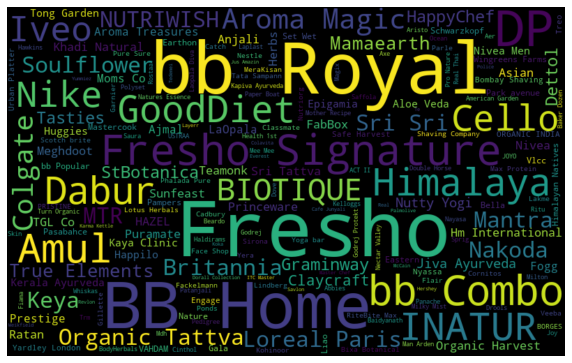

In [21]:


from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_brands) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()
#plt.title("Brand Names")

In [22]:
# Average rating,sale_price and marker_price per category

avg_df=df[['category','rating','sale_price','market_price']].groupby('category').mean().sort_values('rating',ascending=True)
avg_df.reset_index(inplace=True)
avg_df

,category,rating,sale_price,market_price
0,"Kitchen, Garden & Pets",3.797149,507.524615,659.657654
1,"Bakery, Cakes & Dairy",3.918184,142.802750,157.881316
2,Beauty & Hygiene,3.934551,418.679197,493.535302
3,Fruits & Vegetables,3.943410,50.889336,64.433662
4,"Eggs, Meat & Fish",3.943410,288.897486,325.835486
5,Cleaning & Household,3.953821,226.239001,262.191604
6,Gourmet & World Food,3.964382,319.854011,358.420885
7,Snacks & Branded Foods,3.978421,129.593134,140.775231
8,Baby Care,4.008768,534.946180,596.754098
9,"Foodgrains, Oil & Masala",4.040757,193.167500,230.131913


Text(0.5, 1.0, 'Average Rating Per category')

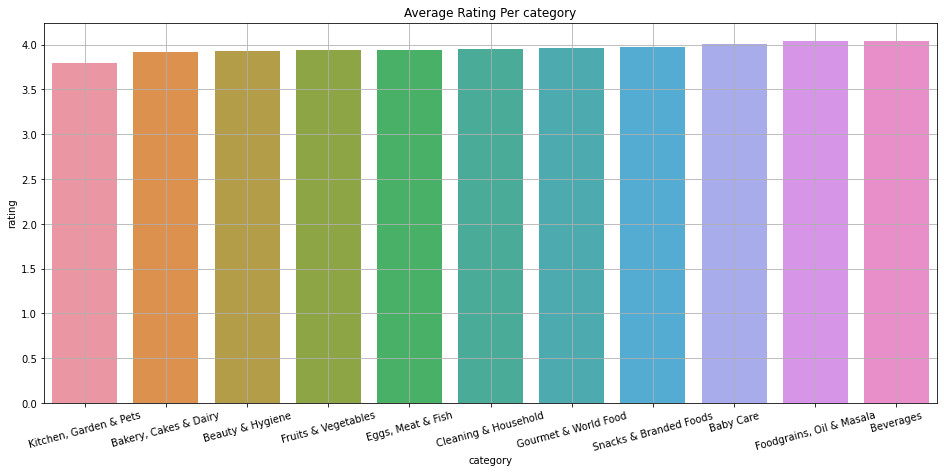

In [23]:
plt.figure(figsize=(16,7))
sns.barplot(x='category',y='rating',data=avg_df)
plt.grid()
plt.xticks(rotation=15)
plt.title('Average Rating Per category')

Text(0.5, 1.0, 'Average Sale Price Per Category')

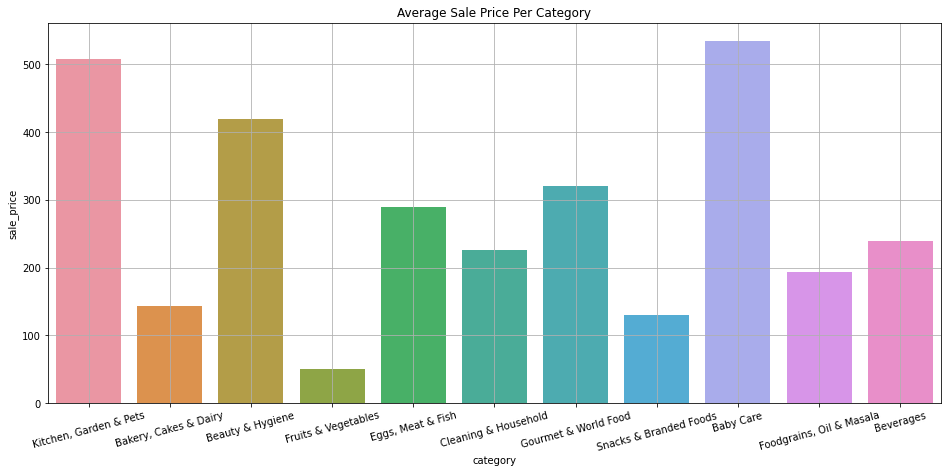

In [24]:
plt.figure(figsize=(16,7))
sns.barplot(x='category',y='sale_price',data=avg_df)
plt.grid()
plt.xticks(rotation=15)
plt.title('Average Sale Price Per Category')

Text(0.5, 1.0, 'Average Market Price Per Category')

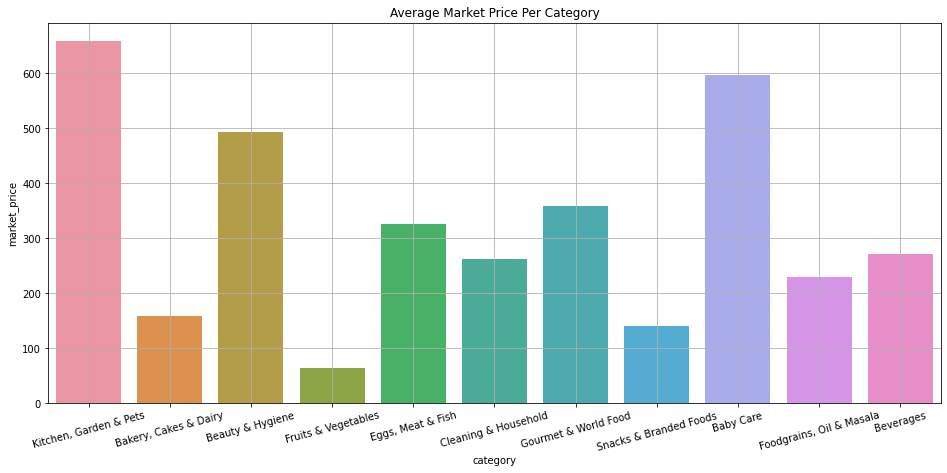

In [25]:
plt.figure(figsize=(16,7))
sns.barplot(x='category',y='market_price',data=avg_df)
plt.grid()
plt.xticks(rotation=15)
plt.title('Average Market Price Per Category')

In [26]:
top_products=df[['product','category']].groupby('category').count()
top_products.reset_index(inplace=True)
top_products # Number of Products per category

,category,product
0,Baby Care,610
1,"Bakery, Cakes & Dairy",851
2,Beauty & Hygiene,7867
3,Beverages,884
4,Cleaning & Household,2674
5,"Eggs, Meat & Fish",350
6,"Foodgrains, Oil & Masala",2676
7,Fruits & Vegetables,557
8,Gourmet & World Food,4690
9,"Kitchen, Garden & Pets",3580


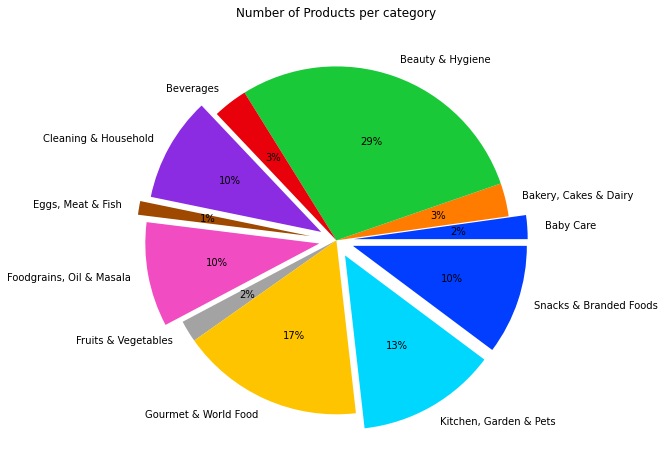

In [27]:
def pie():
    plt.figure(figsize=(16,8))
    keys=[]

    for element in top_products['category']:
        keys.append(element)

    explode = [0.1, 0, 0, 0, 0.1,0.15, 0.1, 0, 0, 0.1,0.1]     
    palette_color = sns.color_palette('bright') 

    data=top_products['product']
    plt.pie(data,labels=keys,colors=palette_color, explode=explode,autopct='%.0f%%')

    plt.title('Number of Products per category')

pie()

In [28]:
top_brands=df[['brand','product']].groupby('brand').count().sort_values('product',ascending=False)
top_brands.reset_index(inplace=True)
top10_brands=top_brands.head(10)




In [29]:
top10_brands

,brand,product
0,Fresho,638
1,bb Royal,539
2,BB Home,428
3,DP,250
4,Fresho Signature,171
5,bb Combo,168
6,Amul,153
7,INATUR,146
8,Himalaya,141
9,Dabur,138


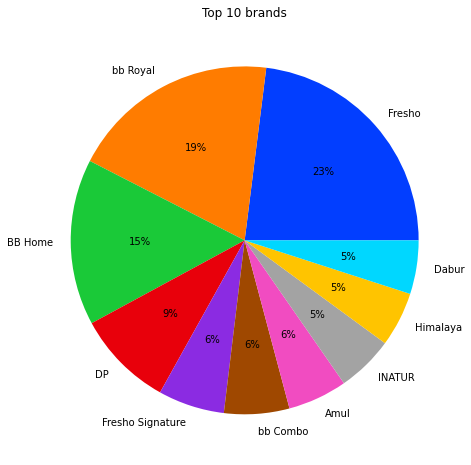

In [30]:
def pie():
    plt.figure(figsize=(16,8))
    keys=[]

    for element in top10_brands['brand']:
        keys.append(element)

         
    palette_color = sns.color_palette('bright') 

    data=top10_brands['product']
    plt.pie(data,labels=keys,colors=palette_color,autopct='%.0f%%')

    plt.title('Top 10 brands')

pie()

In [31]:
# top 10 products with highest Rating

#top_10=df[['product','rating']].groupby('product').sort_values('rating',ascending=False)
#top_10.reset_index(inplace=True)
#top_10


#unique_products_name=df[['product','rating','brand','category']]
#x=unique_products_name.sort_values('rating',ascending=False)
#x.head(10)
